In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_column',1000)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# UNDERSTANDING THE DATASET

In [ ]:
#reding the data file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML 2/Clustering_AbsenteeismAtWork_Data_Project.csv',sep=';')
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [ ]:
#creating a copy
df_c = df.copy()

In [ ]:
#shape
df.shape

(740, 21)

In [ ]:
#data shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [ ]:
#unique counts for all categorical data
categorical_cols = ['Reason for absence','Month of absence','Day of the week','Seasons','Disciplinary failure','Education','Son',	'Social drinker','Social smoker','Pet']
for i in categorical_cols:
  print(i,df[i].nunique())

Reason for absence 28
Month of absence 13
Day of the week 5
Seasons 4
Disciplinary failure 2
Education 4
Son 5
Social drinker 2
Social smoker 2
Pet 6


In [ ]:
#numerical columns
numerical_cols = list(df.drop(columns=categorical_cols).columns)
numerical_cols

['ID',
 'Transportation expense',
 'Distance from Residence to Work',
 'Service time',
 'Age',
 'Work load Average/day ',
 'Hit target',
 'Weight',
 'Height',
 'Body mass index',
 'Absenteeism time in hours']

In [ ]:
#no nulls in the data
df.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [ ]:
#sorting the values
df.sort_values(by='ID',inplace=True)
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
459,1,13,6,3,1,235,11,14,37,253.957,95,0,3,1,0,0,1,88,172,29,8
328,1,25,11,5,4,235,11,14,37,284.031,97,0,3,1,0,0,1,88,172,29,2
342,1,23,12,2,4,235,11,14,37,236.629,93,0,3,1,0,0,1,88,172,29,3
32,1,23,8,5,1,235,11,14,37,205.917,92,0,3,1,0,0,1,88,172,29,4
350,1,25,12,5,4,235,11,14,37,236.629,93,0,3,1,0,0,1,88,172,29,2


# EDA

Which month has the more number of absentees?



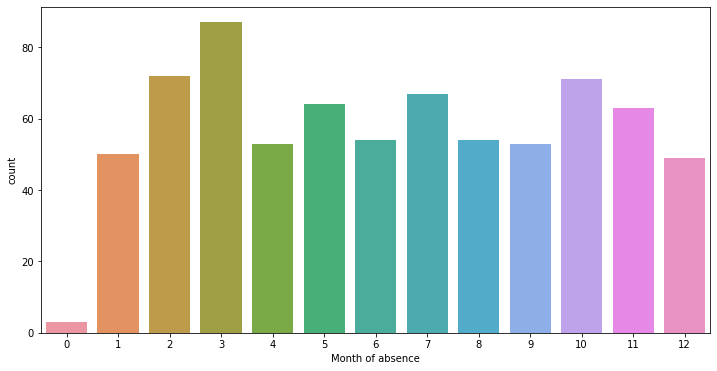

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(x=df['Month of absence'])

Which day has more number of absentees?

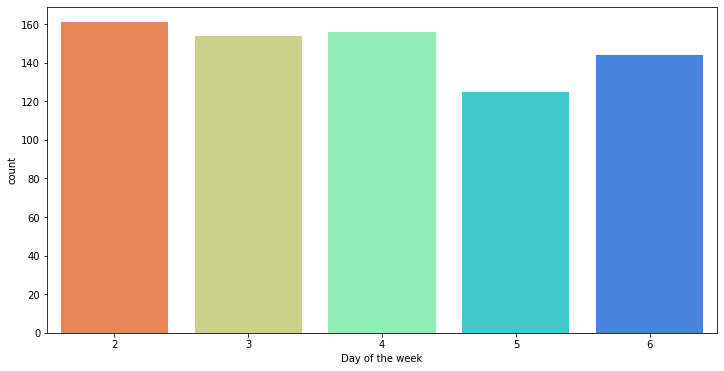

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(x=df['Day of the week'],palette='rainbow_r')

Which season has more number of absentees?

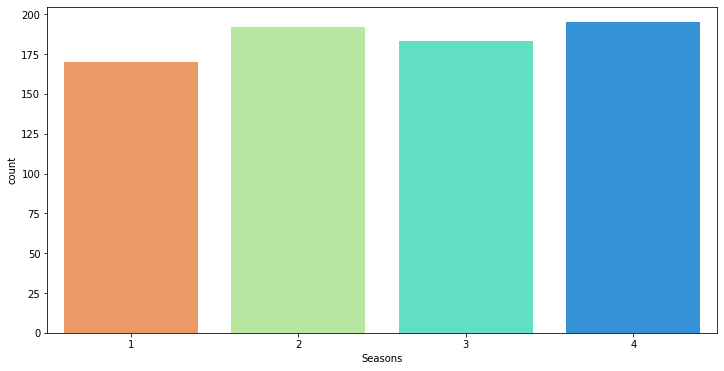

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(x=df['Seasons'],palette='rainbow_r')

Highest children count

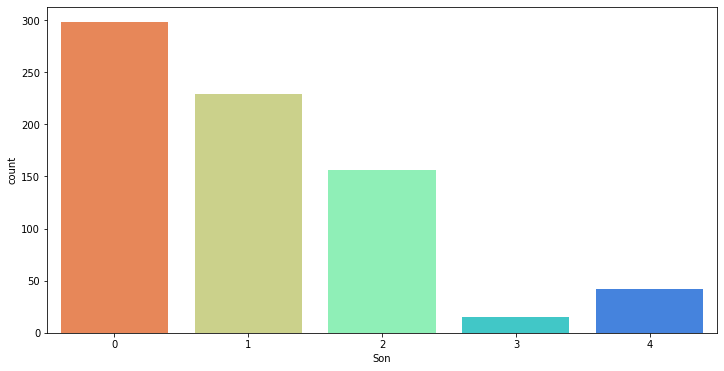

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(x=df['Son'],palette='rainbow_r')

Spread of Hours including Absenteeism/Spread of average work load per day/spread of target/spread of transportation expenses

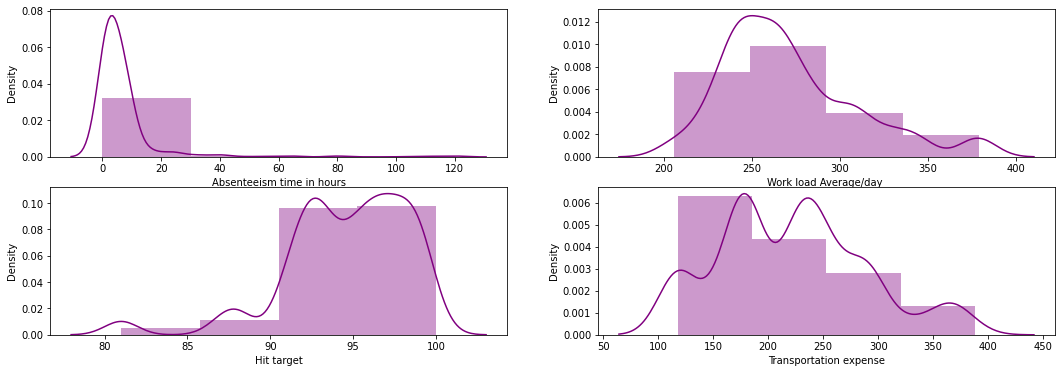

In [ ]:
cols = ['Absenteeism time in hours','Work load Average/day ','Hit target','Transportation expense']
fig, ax = plt.subplots(2,2,figsize=(18,6))
for i,j in zip(cols,ax.flatten()):
  sns.distplot(df[i],color='purple',bins=4,ax=j)

Looking for absenteeism patterns with respect to Service time of employees

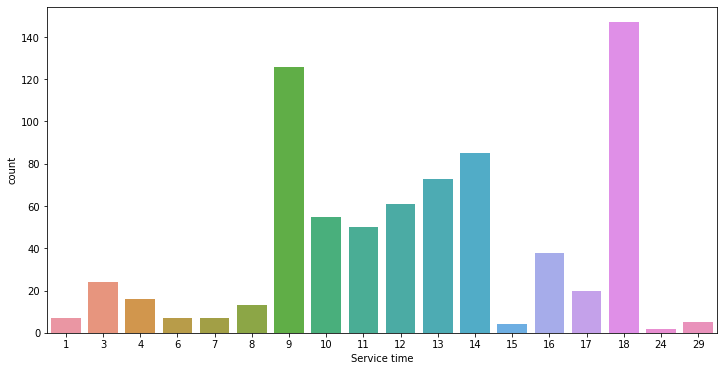

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(x=df['Service time'])

Correlation Analysis on Numerical Columns

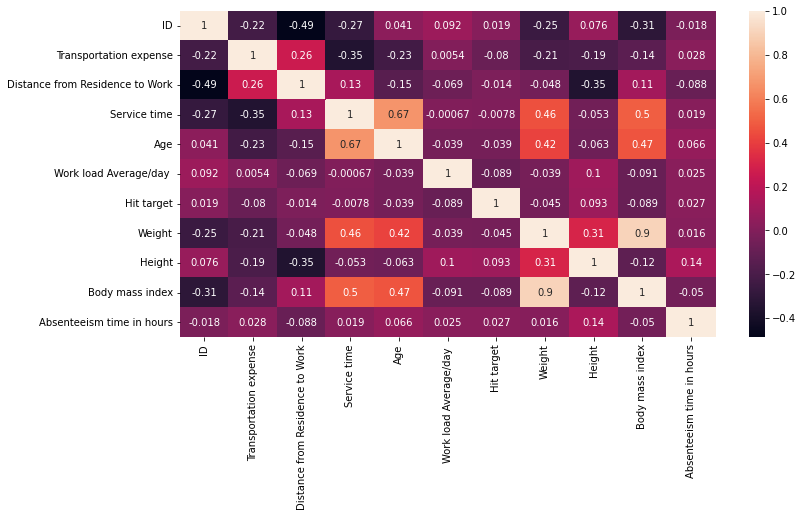

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(df[numerical_cols].corr(),annot=True)

# NORMALISATION

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sca = MinMaxScaler()
x = pd.DataFrame(sca.fit_transform(df),columns=df.columns)
x.drop(columns=['ID','Weight','Height','Body mass index'],inplace=True)

In [ ]:
#our final data frame
print(x.shape)
x.head()

(740, 17)


,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Absenteeism time in hours
0,0.464286,0.500000,0.25,0.0,0.433333,0.12766,0.464286,0.322581,0.277741,0.736842,0.0,0.666667,0.25,0.0,0.0,0.125,0.066667
1,0.892857,0.916667,0.75,1.0,0.433333,0.12766,0.464286,0.322581,0.451612,0.842105,0.0,0.666667,0.25,0.0,0.0,0.125,0.016667
2,0.821429,1.000000,0.00,1.0,0.433333,0.12766,0.464286,0.322581,0.177560,0.631579,0.0,0.666667,0.25,0.0,0.0,0.125,0.025000
3,0.821429,0.666667,0.75,0.0,0.433333,0.12766,0.464286,0.322581,0.000000,0.578947,0.0,0.666667,0.25,0.0,0.0,0.125,0.033333
4,0.892857,1.000000,0.75,1.0,0.433333,0.12766,0.464286,0.322581,0.177560,0.631579,0.0,0.666667,0.25,0.0,0.0,0.125,0.016667


# **CLUSTERING ANALYSIS**

*CREATING A PRINCIPAL COMPONENT ANALYSIS CLUSTERING ALGORITHM*

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=7,random_state=42)
pca_x = pca.fit_transform(x)
pca_ratio =pca.explained_variance_ratio_
sum(pca_ratio)
pca_x1 = pd.DataFrame(pca_x)
pca_x1.head()

,0,1,2,3,4,5,6
0,1.491208,-1.056864,-0.332769,0.081166,-0.344740,-0.074550,0.138958
1,1.972521,-0.419669,0.355130,-0.248669,0.373177,-0.063456,-0.259820
2,1.979756,-0.407651,0.369102,-0.236900,-0.297090,0.236256,-0.507379
3,1.467805,-1.087773,-0.326101,-0.004717,0.166213,-0.202305,0.053298
4,1.969813,-0.412869,0.367797,-0.263323,0.372282,-0.008878,-0.333164


*USING Kmeans ALGORITHM*

For 2 clusters ss is: 0.2239847264218845
For 3 clusters ss is: 0.173639875240058
For 4 clusters ss is: 0.17904623790276086
For 5 clusters ss is: 0.16546316246391965
For 6 clusters ss is: 0.17386195407581082
For 7 clusters ss is: 0.1688368526137977
For 8 clusters ss is: 0.18110319626689592


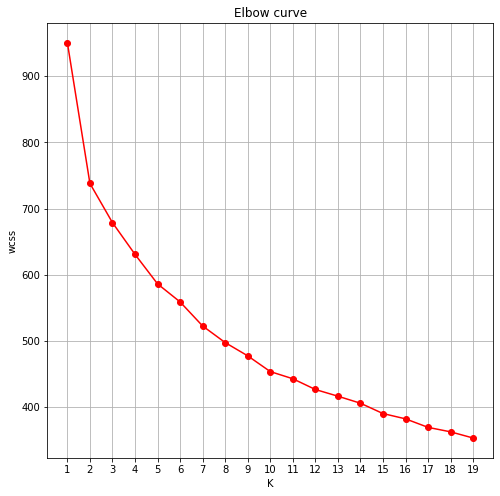

In [ ]:
from sklearn.cluster import KMeans
#PLOTTING ELBOW CURVE ---------------------------------------------------
wcss =[]
for i in range(1,20):
  km = KMeans(n_clusters=i)
  km1 = km.fit(x)
  wcss.append(km1.inertia_)
fig = plt.figure(figsize=(8,8))
plt.plot(range(1,20),wcss,'r-o')
plt.xticks(range(1,20))
plt.grid(True)
plt.xlabel('K')
plt.ylabel('wcss')
plt.title('Elbow curve')
#GETTING SILHOUETTE SCORE -------------------------------------------------
from sklearn.metrics import silhouette_score

for i  in range(2,9):
  km = KMeans(n_clusters=i)
  km.fit(x)
  score = silhouette_score(x,km.labels_)
  print('For',i,'clusters ss is:',score)

In [ ]:
#BUILDING THE MODEL -------------------------------------
kmodel = KMeans(n_clusters=3,random_state=42)
#building the model using ideal k value without dimensionality reduction
ki_model = kmodel.fit_predict(x)
#building the model using ideal k value with dimensionality reduction
ki_pca_model = kmodel.fit_predict(pca_x)
#concatting into main dataframe
x['knn_labels'] = ki_model
x['knn_pca_labels'] = ki_pca_model
x.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Absenteeism time in hours,knn_labels,knn_pca_labels
0,0.464286,0.500000,0.25,0.0,0.433333,0.12766,0.464286,0.322581,0.277741,0.736842,0.0,0.666667,0.25,0.0,0.0,0.125,0.066667,0,0
1,0.892857,0.916667,0.75,1.0,0.433333,0.12766,0.464286,0.322581,0.451612,0.842105,0.0,0.666667,0.25,0.0,0.0,0.125,0.016667,0,0
2,0.821429,1.000000,0.00,1.0,0.433333,0.12766,0.464286,0.322581,0.177560,0.631579,0.0,0.666667,0.25,0.0,0.0,0.125,0.025000,0,0
3,0.821429,0.666667,0.75,0.0,0.433333,0.12766,0.464286,0.322581,0.000000,0.578947,0.0,0.666667,0.25,0.0,0.0,0.125,0.033333,0,0
4,0.892857,1.000000,0.75,1.0,0.433333,0.12766,0.464286,0.322581,0.177560,0.631579,0.0,0.666667,0.25,0.0,0.0,0.125,0.016667,0,0


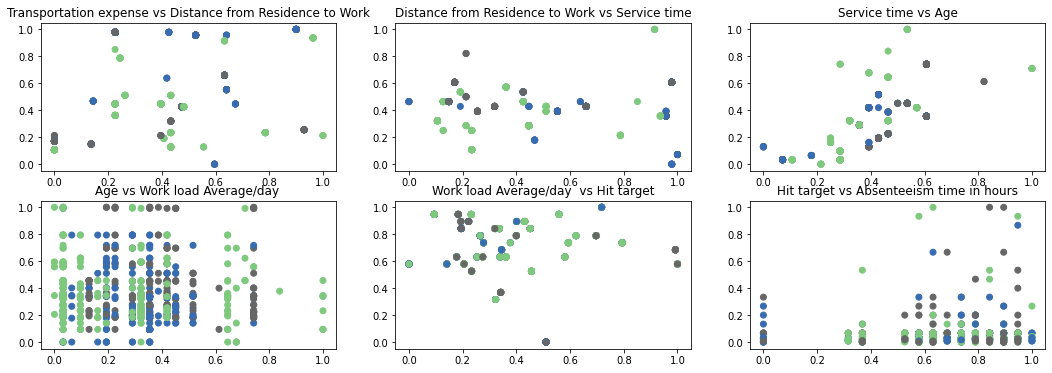

In [ ]:
#PLOTTING FOR KMEANS
fig,ax = plt.subplots(2,3,figsize=(18,6))
sns.set_style("dark")
col = ['Transportation expense','Distance from Residence to Work','Service time','Age','Work load Average/day ','Hit target','Absenteeism time in hours']
for i,j in enumerate(ax.flatten()):
    j.scatter(x[col[i]],x[col[i+1]],c=x['knn_labels'],cmap='Accent')
    j.set_title('{} vs {}'.format(col[i],col[i+1]))

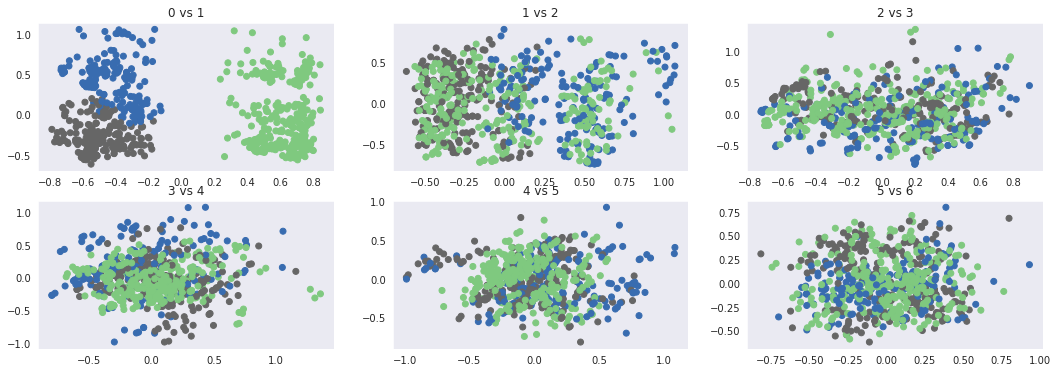

In [ ]:
#PLOTTING FOR KMEANS WITH REDUCED DIMENSIONS
fig,ax = plt.subplots(2,3,figsize=(18,6))
sns.set_style("dark")
col = [0,1,2,3,4,5,6]
for i,j in enumerate(ax.flatten()):
    j.scatter(pca_x1[col[i]],pca_x1[col[i+1]],c=x['knn_pca_labels'],cmap='Accent')
    j.set_title('{} vs {}'.format(col[i],col[i+1]))

*USING AGGLOMERATIVE CLUSTERING*

In [ ]:
#BUILDING THE MODEL --------------------------------------
from sklearn.cluster import AgglomerativeClustering
ag = AgglomerativeClustering(n_clusters=3)
#without dimensionality reduction
ag_model = ag.fit_predict(x)
#with dimensionality reduction
ag_pca_model = ag.fit_predict(pca_x)
#concatting into main dataframe
x['ag_labels'] = ag_model
x['ag_pca_labels'] = ag_pca_model
x.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Absenteeism time in hours,knn_labels,knn_pca_labels,ag_labels,ag_pca_labels
0,0.464286,0.500000,0.25,0.0,0.433333,0.12766,0.464286,0.322581,0.277741,0.736842,0.0,0.666667,0.25,0.0,0.0,0.125,0.066667,0,0,0,0
1,0.892857,0.916667,0.75,1.0,0.433333,0.12766,0.464286,0.322581,0.451612,0.842105,0.0,0.666667,0.25,0.0,0.0,0.125,0.016667,0,0,0,0
2,0.821429,1.000000,0.00,1.0,0.433333,0.12766,0.464286,0.322581,0.177560,0.631579,0.0,0.666667,0.25,0.0,0.0,0.125,0.025000,0,0,0,0
3,0.821429,0.666667,0.75,0.0,0.433333,0.12766,0.464286,0.322581,0.000000,0.578947,0.0,0.666667,0.25,0.0,0.0,0.125,0.033333,0,0,0,0
4,0.892857,1.000000,0.75,1.0,0.433333,0.12766,0.464286,0.322581,0.177560,0.631579,0.0,0.666667,0.25,0.0,0.0,0.125,0.016667,0,0,0,0


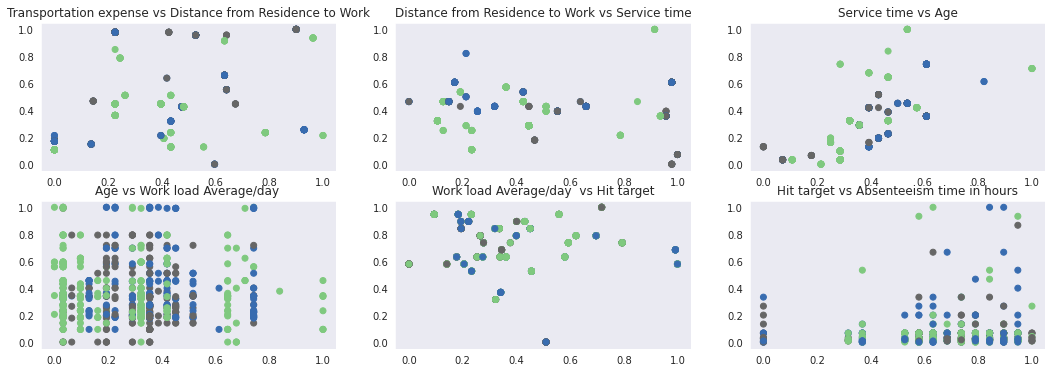

In [ ]:
#PLOTTING FOR HCA
fig,ax = plt.subplots(2,3,figsize=(18,6))
sns.set_style("dark")
col = ['Transportation expense','Distance from Residence to Work','Service time','Age','Work load Average/day ','Hit target','Absenteeism time in hours']
for i,j in enumerate(ax.flatten()):
    j.scatter(x[col[i]],x[col[i+1]],c=x['ag_labels'],cmap='Accent')
    j.set_title('{} vs {}'.format(col[i],col[i+1]))

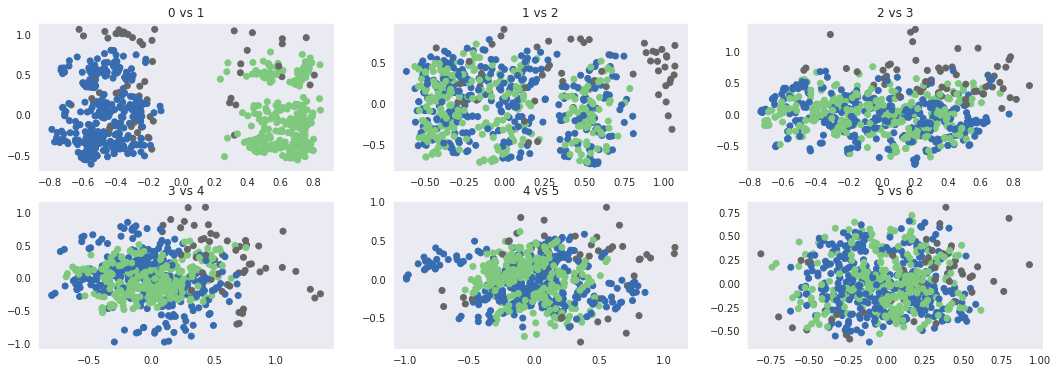

In [ ]:
#PLOTTING FOR HCA WITH REDUCED DIMENSIONS
fig,ax = plt.subplots(2,3,figsize=(18,6))
sns.set_style("dark")
col = [0,1,2,3,4,5,6]
for i,j in enumerate(ax.flatten()):
    j.scatter(pca_x1[col[i]],pca_x1[col[i+1]],c=x['ag_pca_labels'],cmap='Accent')
    j.set_title('{} vs {}'.format(col[i],col[i+1]))

*USING DBSCAN ALGORITHM*


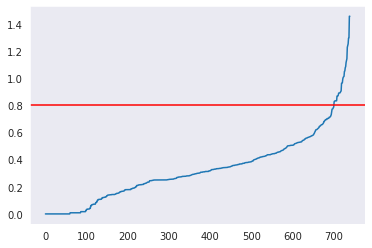

In [ ]:
#finding hyperparameter values optimum epsilon and min samples values for x
#finding eps from k distance graph
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=2)
nnfit = nn.fit(x)
distance,indices = nnfit.kneighbors(x)
#plotting data points sorted y distance vs epsilon value
distance=np.sort(distance,axis=0)
distance=distance[:,1]
plt.plot(distance)
plt.axhline(y=0.8,c='r')

In [ ]:
#find optimum value of minsamples hyperparameter by setting that evaluated value of eps
from sklearn.cluster import DBSCAN
eps= 0.8
for i in range(1,25):
    cluster = DBSCAN(eps=eps,min_samples=i)
    clust_labels=cluster.fit_predict(x)

    X=clust_labels+2
    Y=np.bincount(X)
    z=np.nonzero(Y)[0]
    result=list(zip(z,Y[z]))
    print('eps=',eps,'| min samples',i,'| obtained clustering:',result)

eps= 0.8 | min samples 1 | obtained clustering: [(2, 267), (3, 1), (4, 4), (5, 2), (6, 143), (7, 211), (8, 19), (9, 1), (10, 2), (11, 1), (12, 1), (13, 4), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 4), (27, 2), (28, 20), (29, 1), (30, 4), (31, 1), (32, 1), (33, 1), (34, 4), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 3), (46, 1), (47, 5), (48, 1), (49, 1), (50, 2), (51, 1), (52, 1), (53, 3), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1)]
eps= 0.8 | min samples 2 | obtained clustering: [(1, 39), (2, 267), (3, 4), (4, 2), (5, 143), (6, 211), (7, 19), (8, 2), (9, 4), (10, 2), (11, 4), (12, 2), (13, 20), (14, 4), (15, 4), (16, 3), (17, 5), (18, 2), (19, 3)]
eps= 0.8 | min samples 3 | obtained clustering: [(1, 49), (2, 267), (3, 4), (4, 143), (5, 211), (6, 19), (7, 4), (8, 4), (9, 20), (10, 4), (11, 4), (12, 3), (13, 5), (14, 3)]
eps= 0.8 | min samples 4 | obtained cluster

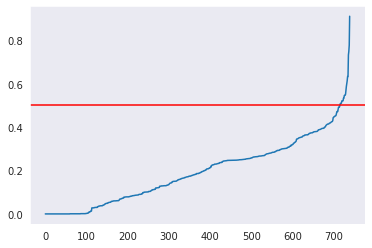

In [ ]:
#finding hyperparameter values optimum epsilon and min samples values for pca_x
#finding eps from k distance graph
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=2)
nnfit = nn.fit(pca_x)
distance,indices = nnfit.kneighbors(pca_x)
#plotting data points sorted y distance vs epsilon value
distance=np.sort(distance,axis=0)
distance=distance[:,1]
plt.plot(distance)
plt.axhline(y=0.5,c='r')

In [ ]:
#find optimum value of minsamples hyperparameter by setting that evaluated value of eps
from sklearn.cluster import DBSCAN
eps= 0.5
for i in range(1,25):
    cluster = DBSCAN(eps=eps,min_samples=i)
    clust_labels=cluster.fit_predict(x)

    X=clust_labels+2
    Y=np.bincount(X)
    z=np.nonzero(Y)[0]
    result=list(zip(z,Y[z]))
    print('eps=',eps,'| min samples',i,'| obtained clustering:',result)

eps= 0.5 | min samples 1 | obtained clustering: [(2, 40), (3, 4), (4, 2), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 2), (14, 2), (15, 2), (16, 4), (17, 80), (18, 22), (19, 1), (20, 1), (21, 3), (22, 1), (23, 1), (24, 1), (25, 38), (26, 1), (27, 8), (28, 23), (29, 2), (30, 1), (31, 1), (32, 3), (33, 1), (34, 1), (35, 34), (36, 32), (37, 5), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 11), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 2), (55, 1), (56, 1), (57, 2), (58, 2), (59, 2), (60, 1), (61, 3), (62, 6), (63, 1), (64, 1), (65, 1), (66, 1), (67, 8), (68, 1), (69, 1), (70, 1), (71, 3), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 3), (79, 1), (80, 5), (81, 3), (82, 2), (83, 1), (84, 1), (85, 1), (86, 1), (87, 4), (88, 5), (89, 1), (90, 1), (91, 1), (92, 1), (93, 2), (94, 1), (95, 1), (96, 1), (97, 2), (98, 1), (99, 1), (100, 2), (101, 1), (102, 2), (103, 1), (104, 1), (105, 4), (106, 3),

In [ ]:
#BUILDING THE MODEL---------------------------
#without dimensionality reduction
db = DBSCAN(eps=0.8, min_samples=13)
db_model = db.fit_predict(x)
#with dimensionality reduction
db1 = DBSCAN(eps=0.5, min_samples=13)
db_pca_model = db1.fit_predict(pca_x)
#concatting into main dataframe
x['db_labels'] = db_model
x['db_pca_labels'] = db_pca_model
x.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Absenteeism time in hours,knn_labels,knn_pca_labels,ag_labels,ag_pca_labels,db_labels,db_pca_labels
0,0.464286,0.500000,0.25,0.0,0.433333,0.12766,0.464286,0.322581,0.277741,0.736842,0.0,0.666667,0.25,0.0,0.0,0.125,0.066667,0,0,0,0,0,1
1,0.892857,0.916667,0.75,1.0,0.433333,0.12766,0.464286,0.322581,0.451612,0.842105,0.0,0.666667,0.25,0.0,0.0,0.125,0.016667,0,0,0,0,0,0
2,0.821429,1.000000,0.00,1.0,0.433333,0.12766,0.464286,0.322581,0.177560,0.631579,0.0,0.666667,0.25,0.0,0.0,0.125,0.025000,0,0,0,0,0,0
3,0.821429,0.666667,0.75,0.0,0.433333,0.12766,0.464286,0.322581,0.000000,0.578947,0.0,0.666667,0.25,0.0,0.0,0.125,0.033333,0,0,0,0,0,1
4,0.892857,1.000000,0.75,1.0,0.433333,0.12766,0.464286,0.322581,0.177560,0.631579,0.0,0.666667,0.25,0.0,0.0,0.125,0.016667,0,0,0,0,0,0


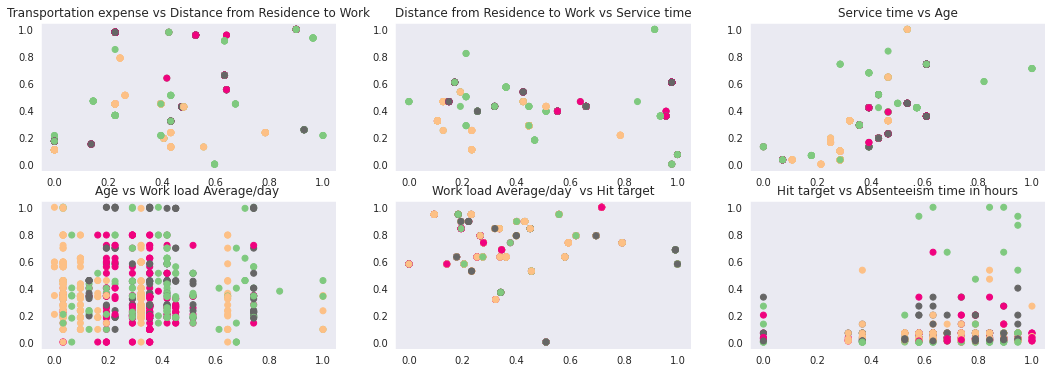

In [ ]:
#PLOTTING FOR DBSCAN WITH NO REDUCED DIMENSIONS
fig,ax = plt.subplots(2,3,figsize=(18,6))
sns.set_style("dark")
col = ['Transportation expense','Distance from Residence to Work','Service time','Age','Work load Average/day ','Hit target','Absenteeism time in hours']
for i,j in enumerate(ax.flatten()):
    j.scatter(x[col[i]],x[col[i+1]],c=x['db_labels'],cmap='Accent')
    j.set_title('{} vs {}'.format(col[i],col[i+1]))

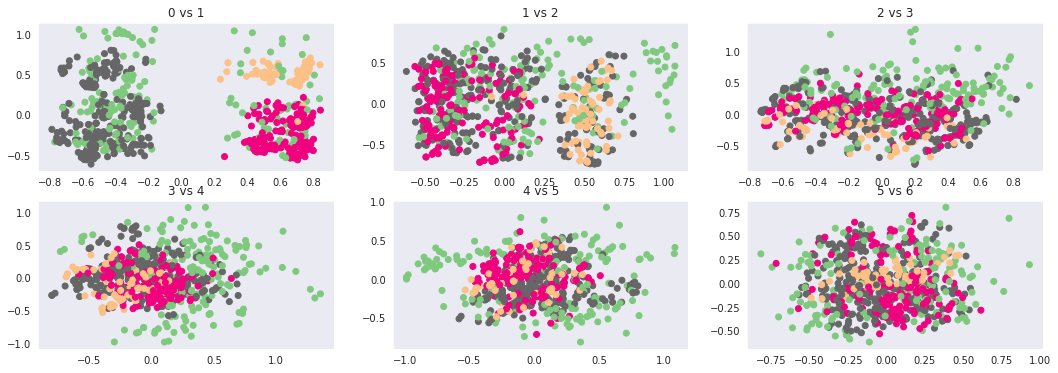

In [ ]:
#PLOTTING FOR DBSCAN WITH REDUCED DIMENSIONS
fig,ax = plt.subplots(2,3,figsize=(18,6))
sns.set_style("dark")
col = [0,1,2,3,4,5,6]
for i,j in enumerate(ax.flatten()):
    j.scatter(pca_x1[col[i]],pca_x1[col[i+1]],c=x['db_pca_labels'],cmap='Accent')
    j.set_title('{} vs {}'.format(col[i],col[i+1]))

In [ ]:
#comparisions
from sklearn import metrics
from sklearn.metrics import silhouette_score
#kmeans
k = print("KNN SS without dimensionality reduction: %0.3f" % metrics.silhouette_score(x, x['knn_labels']))
k1 = print("KNN SS with dimensionality reduction: %0.3f" % metrics.silhouette_score(pca_x, x['knn_pca_labels']))
#aglo
a = print("AGLO SS without dimensionality reduction: %0.3f" % metrics.silhouette_score(x, x['ag_labels']))
a1 = print("AGLO SS with dimensionality reduction: %0.3f" % metrics.silhouette_score(pca_x, x['ag_pca_labels']))
#dbscan
d = print("DBSCAN SS without dimensionality reduction: %0.3f" % metrics.silhouette_score(x, x['db_labels']))
d1 = print("DBSCAN SS with dimensionality reduction: %0.3f" % metrics.silhouette_score(pca_x, x['db_pca_labels']))

KNN SS without dimensionality reduction: 0.410
KNN SS with dimensionality reduction: 0.492
AGLO SS without dimensionality reduction: 0.410
AGLO SS with dimensionality reduction: 0.515
DBSCAN SS without dimensionality reduction: 0.421
DBSCAN SS with dimensionality reduction: 0.439


In [ ]:
d = {'kmeans':[0.410,0.492],'AGLO':[0.410,0.515],'DBSCAN':[0.421,0.439]}
d2 = pd.DataFrame(d)
d2.rename(index={0:'without dimensionality reduction',1:'with dimensionality reduction'},inplace=True)
d2

,kmeans,AGLO,DBSCAN
without dimensionality reduction,0.410,0.410,0.421
with dimensionality reduction,0.492,0.515,0.439


TAKING SILHOUETTE SCORES INTO CONSIDERATION :
---
AGGLOMERATIVE CLUSTERING + PCA takes the first spot with a score 0f 0.515 followed by KMEANS + PCA with a score of 0.492 and later DBSCAN + PCA with 0.439.


# **BUSINESS CONCLUSIONS USING IDEAL MODEL**
USING NEW CLASSES FOR MAKING CONCLUSIONS

In [ ]:
#TAKING AGGLOMERATIVE CLUSTERING + PCA AS OUR IDEAL MODEL AND COMING INTO SOME BUSINESS CONCLUSIONS
df_c['aggpca_labels'] = x.ag_pca_labels
df_c.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,aggpca_labels
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4,0
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2,0
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4,0
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2,0


In [ ]:
df_c.nunique()

ID                                 36
Reason for absence                 28
Month of absence                   13
Day of the week                     5
Seasons                             4
Transportation expense             24
Distance from Residence to Work    25
Service time                       18
Age                                22
Work load Average/day              38
Hit target                         13
Disciplinary failure                2
Education                           4
Son                                 5
Social drinker                      2
Social smoker                       2
Pet                                 6
Weight                             26
Height                             14
Body mass index                    17
Absenteeism time in hours          19
aggpca_labels                       3
dtype: int64

In [ ]:
import collections as c #collection module counter class used
c0 = df_c['Reason for absence'].loc[df_c.aggpca_labels == 0].values
c1 = df_c['Reason for absence'].loc[df_c.aggpca_labels == 1].values
c2 = df_c['Reason for absence'].loc[df_c.aggpca_labels == 2].values
countc0 = c.Counter(c0)
countc1 = c.Counter(c1)
countc2 = c.Counter(c2)
#-------------------------------------------
for key, value in countc1.items():
  print(f'{key}:{value}')
#cluster 0,1,2 :  23,28,27 reasons
#medical consultation (23),physiotherapy (27), dental consultation (28)
#conclusion 1 based on reason : 
# Since majority of the reasons for absenteeism at work is due to medical/dental consultation and physiotherapy, all three being medical reasons, 
#companies can tune their rules by conducting medical camps in office hours itself, which might help in reducing the absenteeism percentage by major count in the cluster 2.

23:85
18:12
24:2
11:13
28:60
19:25
22:26
14:7
0:33
26:16
13:21
21:3
10:9
6:4
7:7
27:25
1:9
25:12
17:1
12:3
5:1
8:2
9:2
15:1
4:1


In [ ]:
d0 = df_c['Day of the week'].loc[df_c.aggpca_labels == 0].values
d1 = df_c['Day of the week'].loc[df_c.aggpca_labels == 1].values
d2 = df_c['Day of the week'].loc[df_c.aggpca_labels == 2].values
countd0 = c.Counter(d0)
countd1 = c.Counter(d1)
countd2 = c.Counter(d2)
#-------------------------------------------
for key, value in countd1.items():
  print(f'{key}:{value}')
  #4. Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6))
#cluster 0 monday,wednesday
#cluster 1 fri,mon
#cluster 2 tue

6:72
2:76
5:68
3:87
4:77


In [ ]:
s0 = df_c['Seasons'].loc[df_c.aggpca_labels == 0].values
s1 = df_c['Seasons'].loc[df_c.aggpca_labels == 1].values
s2 = df_c['Seasons'].loc[df_c.aggpca_labels == 2].values
counts0 = c.Counter(s0)
counts1 = c.Counter(s1)
counts2 = c.Counter(s2)
#-------------------------------------------
for key, value in counts2.items():
  print(f'{key}:{value}')
#5. Seasons (summer (1), autumn (2), winter (3), spring (4))
#cluster 0 winter,autumn
#cluster 1 spring and summer
#cluster 2 autumn

1:18
4:7
2:20
3:13


In [ ]:
f0 = df_c['Absenteeism time in hours'].loc[df_c.aggpca_labels == 0].values
f1 = df_c['Absenteeism time in hours'].loc[df_c.aggpca_labels == 1].values
f2 = df_c['Absenteeism time in hours'].loc[df_c.aggpca_labels == 2].values
countf0 = c.Counter(f0)
countf1 = c.Counter(f1)
countf2 = c.Counter(f2)
#-------------------------------------------
for key, value in countf2.items():
  print(f'{key}:{value}')

#cluster 0 8hrs,2-3hrs
#cluster 1 8hrs,1-3hrs
#cluster 2 8hrs

8:20
7:1
2:13
1:9
3:5
4:4
24:3
0:2
112:1


# **CONCLUSIONS**
1.	Once all the data had been analyzed, I came up with few suggestions for the company to consider improving productivity and reducing absenteeism.
2.	I have made my conclusions on cluster wise keeping season wise inputs. The first would be seasonally organized activities. The company would have activities where so the employee would receive variable pay/bonus/coupons. Activities to be held on Mondays and Wednesdays, during the winter and autumn and on Mondays and Fridays, during the spring and summer respectively.
3. Fridays in summers can be given a permit of work from home, some productivity is always better than no productivity.
4.	Since majority of the employees get off work early by 2-3 hrs., activities or team lunches can be planned on those days.
5.	Due to long sitting hours companies can get stand up desks for employees, to reduce physiotherapy checkups.
6.	Since majority of the reasons for absenteeism at work is due to medical/dental consultation and physiotherapy in all seasons, all three being medical reasons, companies can conduct medical camps in office hours itself, which might help in reducing the absenteeism ratio.



## NEW LIBRARY EXPLORATION

In [ ]:
!pip install statsmodels --upgrade

In [ ]:
!pip install dtale

In [ ]:
import dtale

In [ ]:
dtale.show(pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML 2/Clustering_AbsenteeismAtWork_Data_Project.csv',sep=';'))

http://e512fff9f252:40000/dtale/main/6

In [ ]:
!pip install autoviz

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class as avc

In [ ]:
autoviz = avc().AutoViz('/content/drive/MyDrive/Colab Notebooks/ML 2/Clustering_AbsenteeismAtWork_Data_Project.csv',sep=';')

Shape of your Data Set loaded: (740, 21)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
Work load Average/day,38,float64,0,0.000000,5.135135,0,
ID,36,int64,0,0.000000,4.864865,0,
Reason for absence,28,int64,0,0.000000,3.783784,0,
Weight,26,int64,0,0.000000,3.513514,0,
Distance from Residence to Work,25,int64,0,0.000000,3.378378,0,
Transportation expense,24,int64,0,0.000000,3.243243,0,
Age,22,int64,0,0.000000,2.972973,0,
Absenteeism time in hours,19,int64,0,0.000000,2.567568,0,
Service time,18,int64,0,0.000000,2.432432,0,
Body mass index,17,int64,0,0.000000,2.297297,0,


    21 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
All Plots done
Time to run AutoViz = 4 seconds 

 ###################### AUTO VISUALIZATION Completed ########################
